# 🖼️ Classificação de Imagens com CNN no CIFAR-10

## 📌 Sobre o Dataset CIFAR-10
O **CIFAR-10** é um dataset contendo **60.000 imagens coloridas de 32x32 pixels** divididas em **10 classes diferentes**:

- ✈ Avião
- 🚗 Automóvel
- 🐦 Pássaro
- 🐱 Gato
- 🦌 Cervo
- 🐶 Cachorro
- 🐸 Sapo
- 🐴 Cavalo
- 🚢 Navio
- 🚚 Caminhão

O objetivo do modelo é classificar corretamente as imagens dentro dessas categorias.

---

## 🚀 O que o código faz?
Este código implementa uma **Rede Neural Convolucional (CNN)** otimizada para classificação de imagens no dataset **CIFAR-10**.

🔹 **Carrega o dataset CIFAR-10**  
🔹 **Realiza o pré-processamento das imagens**  
🔹 **Treina um modelo CNN melhorado com:**  
   - **Batch Normalization** para estabilidade  
   - **Dropout** para reduzir overfitting  
   - **Data Augmentation** para melhorar generalização  
   - **Mais camadas convolucionais e filtros**  
🔹 **Avalia o modelo com:**  
   - Relatório de classificação  
   - Matriz de confusão  
   - **Curva ROC e AUC para cada classe**  
🔹 **Exibe imagens preditas pelo modelo**  

---

## 📊 Melhorias no Modelo
✔ **Ajuste na Arquitetura** → Mais camadas convolucionais e filtros para capturar melhor os padrões.  
✔ **Batch Normalization** → Acelera o aprendizado e estabiliza o treinamento.  
✔ **Dropout** → Reduz overfitting, tornando o modelo mais robusto.  
✔ **Data Augmentation** → Introduz variações nas imagens de treino, melhorando a capacidade de generalização.  
✔ **Aumento das Épocas** → Mais tempo para a CNN aprender os padrões.  
✔ **Otimização da Taxa de Aprendizado** → Ajuste fino para melhorar a precisão.  

---

## 📊 Avaliação do Modelo
Após o treinamento, o código exibe:

✔ **Relatório de Classificação**  
✔ **Matriz de Confusão**  
✔ **Curva ROC para cada classe do CIFAR-10**  

📌 **Matriz de Confusão:**  
A matriz de confusão mostra a distribuição das previsões do modelo. Quanto mais valores corretos nas diagonais principais, melhor a classificação.

📌 **Curva ROC & AUC:**  
A **Curva ROC** ilustra a relação entre a **Taxa de Verdadeiros Positivos (TPR)** e a **Taxa de Falsos Positivos (FPR)**.  
O **AUC (Área Sob a Curva)** indica a qualidade do modelo, sendo **1.0** um modelo perfeito e **0.5** equivalente a um chute aleatório.

---

## 🔧 Requisitos
Instale as dependências antes de rodar o código:

```bash
pip install tensorflow numpy matplotlib seaborn scikit-learn


C:\Users\jonat\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


C:\Users\jonat\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - accuracy: 0.2613 - loss: 2.2003 - val_accuracy: 0.4660 - val_loss: 1.4981
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.3927 - loss: 1.6603 - val_accuracy: 0.4776 - val_loss: 1.4907
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.4698 - loss: 1.4717 - val_accuracy: 0.4179 - val_loss: 1.6526
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5200 - loss: 1.3342 - val_accuracy: 0.6501 - val_loss: 1.0593
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5601 - loss: 1.2433 - val_accuracy: 0.5858 - val_loss: 1.1166
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5908 - loss: 1.1586 - val_accuracy: 0.5188 - val_loss: 1.4311
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.6179 - loss: 1.0906 - val_accuracy: 0.6247 - val_loss: 1.1038
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6401 - loss: 1.0440 - val_accurac

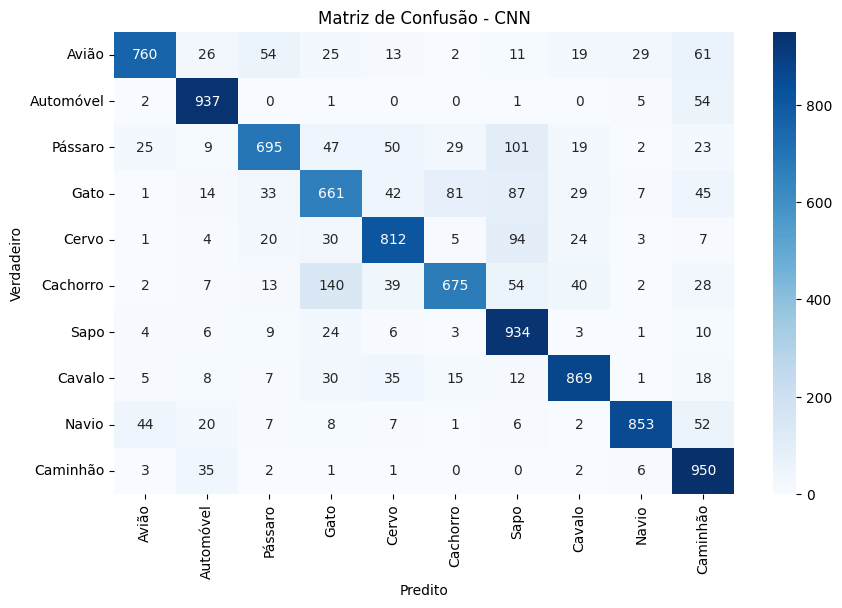

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


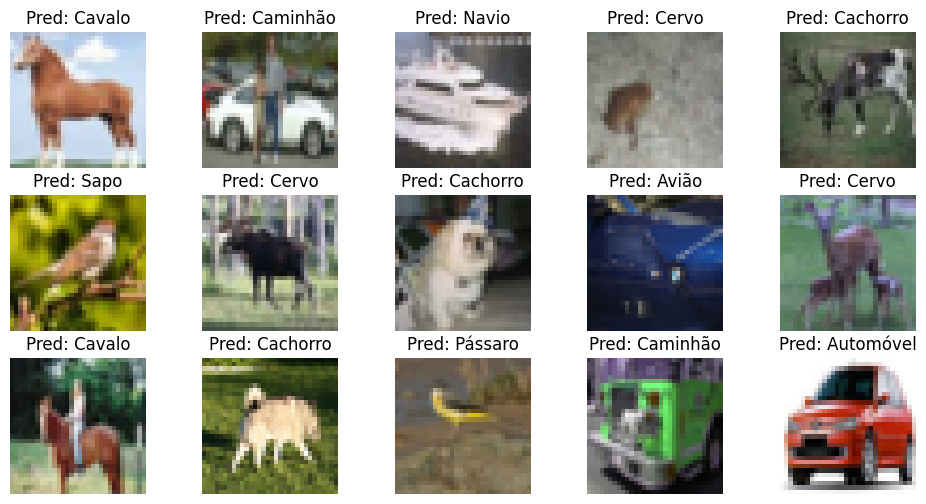

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


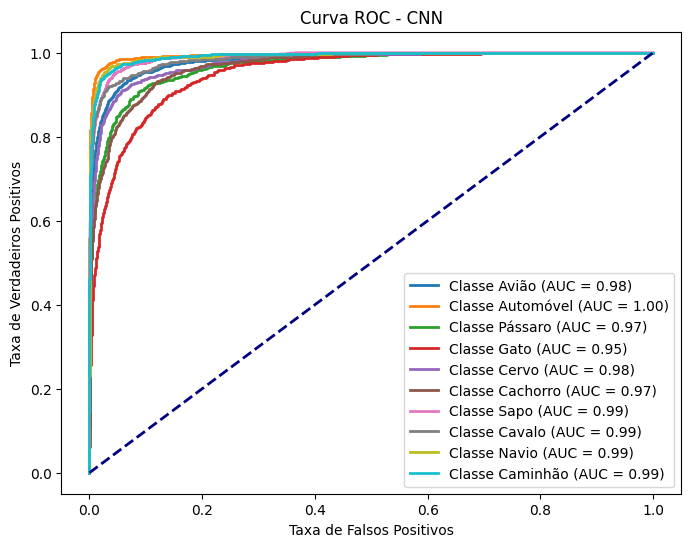

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10 # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

# 🔹 1. Carregar e Pré-processar o dataset CIFAR-10
def carregar_dados():
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    
    # Normalizar os valores dos pixels (0-255 → 0-1)
    X_train, X_test = X_train / 255.0, X_test / 255.0

    # Converter os rótulos para one-hot encoding
    y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

    return X_train, X_test, y_train, y_test

# 🔹 2. Criar a CNN Melhorada
def criar_modelo():
    modelo = Sequential([
        Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        MaxPooling2D(2,2),
        
        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(256, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),  # Regularização
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')  # 10 classes de saída
    ])
    
    modelo.compile(optimizer=Adam(learning_rate=0.0005),  # Taxa de aprendizado reduzida
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])
    
    return modelo

# 🔹 3. Aplicar Data Augmentation para melhorar generalização
def criar_datagen():
    datagen = ImageDataGenerator(
        rotation_range=20,       # Rotação aleatória de até 20°
        width_shift_range=0.2,   # Mudança horizontal de até 20%
        height_shift_range=0.2,  # Mudança vertical de até 20%
        horizontal_flip=True,    # Espelhamento horizontal
        shear_range=0.2,         # Cisalhamento aleatório
        zoom_range=0.2           # Zoom aleatório
    )
    return datagen

# 🔹 4. Treinar o modelo com Data Augmentation
def treinar_modelo(modelo, X_train, y_train, X_test, y_test, datagen):
    historico = modelo.fit(datagen.flow(X_train, y_train, batch_size=64), 
                           epochs=50, 
                           validation_data=(X_test, y_test))
    return historico

# 🔹 5. Avaliar o modelo
def avaliar_modelo(modelo, X_test, y_test):
    y_pred = np.argmax(modelo.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Relatório de classificação
    print("📊 Relatório de Classificação:")
    print(classification_report(y_true, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    plotar_matriz_confusao(cm)

# 🔹 6. Função para exibir a matriz de confusão
def plotar_matriz_confusao(cm):
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.title("Matriz de Confusão - CNN")
    plt.show()

# 🔹 7. Plotar algumas imagens com previsões
def mostrar_amostras(X_test, y_test, modelo):
    fig, axes = plt.subplots(3, 5, figsize=(12, 6))
    indices = np.random.choice(len(X_test), 15, replace=False)
    
    for i, ax in enumerate(axes.flat):
        idx = indices[i]
        img = X_test[idx]
        pred = np.argmax(modelo.predict(np.expand_dims(img, axis=0)))

        ax.imshow(img)
        ax.set_title(f"Pred: {classes[pred]}")
        ax.axis("off")
    
    plt.show()

# 🔹 8. Curva ROC e AUC
def plotar_curva_roc(modelo, X_test, y_test):
    y_pred_proba = modelo.predict(X_test)

    plt.figure(figsize=(8, 6))
    for i in range(10):  # Para cada classe do CIFAR-10
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"Classe {classes[i]} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title("Curva ROC - CNN")
    plt.legend(loc="lower right")
    plt.show()

# 🚀 Executar fluxo principal
if __name__ == "__main__":
    classes = ["Avião", "Automóvel", "Pássaro", "Gato", "Cervo", "Cachorro", "Sapo", "Cavalo", "Navio", "Caminhão"]
    
    # Carregar os dados
    X_train, X_test, y_train, y_test = carregar_dados()

    # Criar Data Augmentation
    datagen = criar_datagen()

    # Criar e treinar o modelo
    modelo_cnn = criar_modelo()
    historico = treinar_modelo(modelo_cnn, X_train, y_train, X_test, y_test, datagen)

    # Avaliar o modelo
    avaliar_modelo(modelo_cnn, X_test, y_test)

    # Exibir imagens de amostra com previsões
    mostrar_amostras(X_test, y_test, modelo_cnn)

    # Exibir Curva ROC
    plotar_curva_roc(modelo_cnn, X_test, y_test)
